In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs

# import module

In [2]:
import sys
sys.path.append("..")
import src.pattern_statistic as ps
import src.eof_plots as ept
import src.spatial_pattern as sp

import importlib
importlib.reload(ps) # after changed the source code
importlib.reload(ept)
importlib.reload(sp)

<module 'src.spatial_pattern' from '/work/mh0033/m300883/3rdPanel/scripts/../src/spatial_pattern.py'>

# data load and process

 data load

In [4]:
# %%
allens = xr.open_dataset("/work/mh0033/m300883/transition/gr19/gphSeason/allens_season_time.nc")
#%% split ens
splitens = sp.split_ens(allens)

#%% demean ens-mean
demean = splitens-splitens.mean(dim = 'ens')

#%% select traposphere
trop = demean.sel(hlayers = slice(20000,100000))

eof decompose

In [5]:
yearly_eof,_,_ = sp.season_eof(trop.var156,nmode=2,method ="rolling_eof",
window=10,fixed_pattern='first',return_full_eof= False,independent = True,standard=True)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
eof_all,_,_ = sp.season_eof(trop.var156,nmode=2,method ="eof",independent = True)

  0%|          | 0/11 [00:00<?, ?it/s]

# Plot

In [12]:
all_eof = eof_all
first_eof = yearly_eof.isel(time = 0)
last_eof = yearly_eof.isel(time = -1)

In [16]:
# %% to lon-height
all_lon_height_ea = ps.lon_height(all_eof,mode='EA')
first10_lon_height_ea = ps.lon_height(first_eof,mode='EA')
last10_lon_height_ea = ps.lon_height(last_eof,mode='EA')

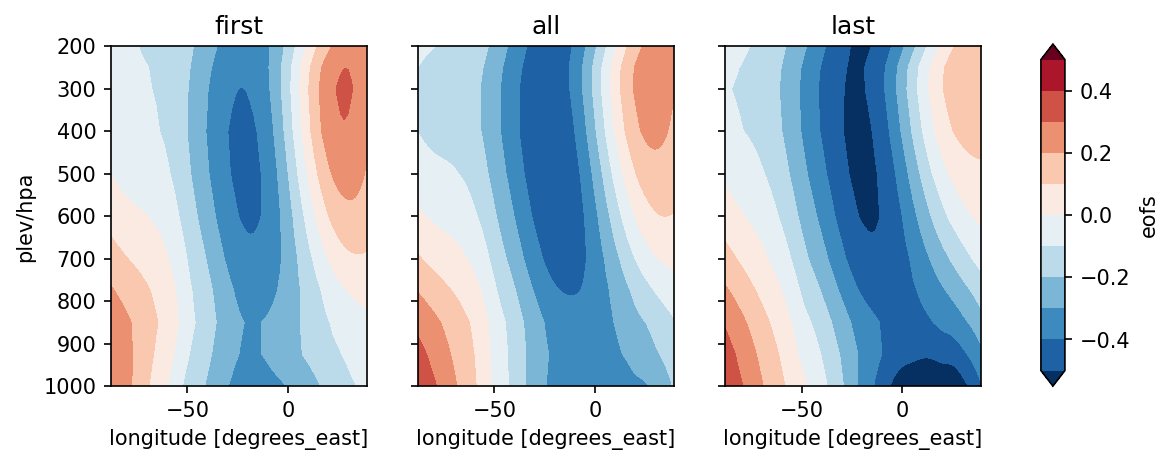

In [35]:
from sklearn.cross_decomposition import PLSCanonical


fig,axes = plt.subplots(1,3,figsize = (8,3),dpi = 150,sharey=True)

levels = np.arange(-0.5,0.51,0.1)

first10_lon_height_ea.plot.contourf(x = 'lon',y = 'hlayers',ax = axes[0],
ylim = (1000,200),levels = levels,extend = 'both',add_colorbar = False)
all_lon_height_ea.plot.contourf(x = 'lon',y = 'hlayers',ax = axes[1],
ylim = (1000,200),levels = levels,extend = 'both',add_colorbar = False)
im = last10_lon_height_ea.plot.contourf(x = 'lon',y = 'hlayers',ax = axes[2],
ylim = (1000,200),levels = levels,extend = 'both',add_colorbar = False)

axes[0].set_title("first")
axes[1].set_title("all")
axes[2].set_title("last")

axes[0].set_ylabel('plev/hpa')
axes[1].set_ylabel(None)
axes[2].set_ylabel(None)

plt.subplots_adjust(right = 0.85)
cbar_ax = fig.add_axes([0.9, 0.125, 0.02, 0.76])
fig.colorbar(im, cax=cbar_ax,label = 'eofs')

plt.show()
